In [2]:
# %%
import csv
import datetime
import io
import pandas
import plotly.graph_objects
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# from pandas.tseries.offsets import *

import loguru
import requests



In [3]:

# mm = int(f'{datetime.date.today():%m}')-1
# filepath = f'electricityInfo-{datetime.date.today():%Y}{mm:02}.csv'
filepath = f'taiexs-2019.csv'
filename = f'{filepath}'

df = pandas.read_csv(filepath)
df['Date'] = pandas.to_datetime(df['Date'], format='%Y%m%d')
df.index = df['Date']
# df = df.set_index('Date')
# df = df.index >
# df.resample('1W').mean()
df['day_of_week'] = df['Date'].dt.day_name()
# df = df[df['day_of_week']== 'Wednesday']
# df['WEEK ENDING'] = (df['Date'] + pandas.tseries.offsets.Week(weekday=2)).apply(lambda x: x.weekday())
df['WEEK ENDING'] = df['Date'].where( df['Date'] == (( df['Date'] + pandas.tseries.offsets.Week(weekday=2) ) - pandas.tseries.offsets.Week()), df['Date'] + pandas.tseries.offsets.Week(weekday=2))
df

,Date,OpenPrice,HighestPrice,LowestPrice,ClosePrice,day_of_week,WEEK ENDING
Date,,,,,,,
2018-06-01,2018-06-01,10882.68,10954.67,10876.97,10949.08,Friday,2018-06-06
2018-06-04,2018-06-04,11002.15,11109.50,11002.15,11109.50,Monday,2018-06-06
2018-06-05,2018-06-05,11130.03,11131.08,11054.62,11100.11,Tuesday,2018-06-06
2018-06-06,2018-06-06,11111.14,11207.15,11111.14,11201.83,Wednesday,2018-06-06
2018-06-07,2018-06-07,11228.64,11261.68,11188.99,11251.75,Thursday,2018-06-13
...,...,...,...,...,...,...,...
2020-06-18,2020-06-18,11534.20,11567.42,11485.39,11548.33,Thursday,2020-06-24
2020-06-19,2020-06-19,11557.27,11584.88,11542.37,11549.86,Friday,2020-06-24
2020-06-22,2020-06-22,11553.91,11632.88,11553.91,11572.93,Monday,2020-06-24


In [4]:
dfMaT = df[(df['day_of_week']=='Monday') | (df['day_of_week']=='Wednesday')]
dfMaT

,Date,OpenPrice,HighestPrice,LowestPrice,ClosePrice,day_of_week,WEEK ENDING
Date,,,,,,,
2018-06-04,2018-06-04,11002.15,11109.50,11002.15,11109.50,Monday,2018-06-06
2018-06-06,2018-06-06,11111.14,11207.15,11111.14,11201.83,Wednesday,2018-06-06
2018-06-11,2018-06-11,11168.99,11186.67,11118.81,11149.23,Monday,2018-06-13
2018-06-13,2018-06-13,11153.20,11188.01,11119.24,11173.21,Wednesday,2018-06-13
2018-06-20,2018-06-20,10904.80,10969.20,10842.56,10927.44,Wednesday,2018-06-20
...,...,...,...,...,...,...,...
2020-06-10,2020-06-10,11635.99,11740.90,11621.02,11720.16,Wednesday,2020-06-10
2020-06-15,2020-06-15,11436.28,11469.84,11299.45,11306.26,Monday,2020-06-17
2020-06-17,2020-06-17,11525.50,11550.32,11482.32,11534.59,Wednesday,2020-06-17


In [5]:
# dfMaT["diff"] = dfMaT.apply(lambda x: df[df["Date"] == x['WEEK ENDING']]["ClosePrice"], axis=1)
# dfMaT["diff"] = dfMaT.apply(lambda x: df.loc[df["Date"] == x['WEEK ENDING']]["ClosePrice"], axis=1)
# dfMaT['WEEK ENDING'].map(lambda x: (df[df["Date"] == x]["ClosePrice"]))
diff = []
for i in range(len(dfMaT)):
    try:
        if dfMaT.iloc[i]["day_of_week"] == "Monday":
            diff.append(abs(dfMaT.iloc[i+1]["ClosePrice"] - dfMaT.iloc[i]["ClosePrice"]))
        else:
            diff.append(0)
    except:
        diff.append(0)
dfMaT["diff"] = diff
dfMaT
dfMaT = dfMaT[(dfMaT['day_of_week']=='Monday')]

In [6]:
dfMaT["ClosePrice"].diff(periods=1)

Date
2018-06-04       NaN
2018-06-11     39.73
2018-06-25   -362.77
2018-07-02     -8.52
2018-07-09    -57.66
               ...  
2020-05-25    130.63
2020-06-01    207.84
2020-06-08    531.30
2020-06-15   -304.06
2020-06-22    266.67
Name: ClosePrice, Length: 102, dtype: float64

In [5]:
dfMaT["diff"].mean()

110.24367346938762

In [6]:
dfMaT["diff"].describe()

count     98.000000
mean     110.243673
std      135.844657
min        1.760000
25%       37.095000
50%       62.570000
75%      133.990000
max      763.790000
Name: diff, dtype: float64

In [11]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.express as px
import plotly.graph_objects as go
dftip = px.data.tips()
# fig = px.histogram(dfMaT, x = "diff")
# fig.show()
fig = go.Figure(data=[go.Histogram(x=dfMaT["diff"], histnorm='probability')])
fig.show()
# dftip

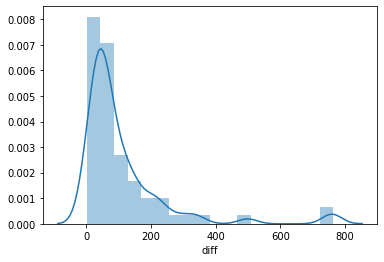

In [81]:
sns.distplot(dfMaT["diff"])

In [83]:
dfMaT[dfMaT["diff"] <= 150].describe()

,OpenPrice,HighestPrice,LowestPrice,ClosePrice,diff
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,10832.301071,10869.795179,10785.370000,10830.834286,58.030000
std,616.273193,608.048622,615.898193,606.748028,38.260438
min,9460.200000,9596.350000,9415.520000,9590.300000,1.760000
25%,10454.742500,10512.325000,10409.982500,10460.122500,33.737500
50%,10810.810000,10851.990000,10764.765000,10836.160000,47.605000
75%,11180.120000,11196.537500,11040.520000,11096.250000,81.775000
max,12094.810000,12114.890000,12046.220000,12113.420000,148.010000


In [102]:
dfwed = pandas.read_csv("/Users/singularity/Downloads/asdfqwr.csv", encoding= "Big5", usecols = ["履約價"], sep=",", index_col=False)
dfwed

,履約價
0,10300.0
1,10300.0
2,10300.0
3,10300.0
4,10400.0
...,...
1057,13800.0
1058,14000.0
1059,14000.0
1060,14000.0


In [110]:
s = len(pandas.bdate_range(start='1/7/2019', end='6/24/2020', freq="W-MON")) == len(pandas.date_range(start='1/7/2019', end='6/24/2020', freq="W-MON"))
# sd = pandas.date_range(start='1/7/2019', end='6/24/2020', freq="W-MON")
# for i in sd:
#     print(i)
print(s)

True
